In [1]:
# Get directory of files
import os


def get_test_data_directory():
    """
    Gets the directory of the test data, e.g. pressure, linear acceleration, etc.
    
    Return: 
        directory: str[]
            A list of absolute addresses pointing to the files within Chin Yang's PD_redo
    """
    # Get the list of folders in 'Testgrounds'
    base = 'D:\\Development\\_git_Parkinson\'s Disease Sensors\\Parkinson-Disease-Repository\\Testground\\Test 3 - Chin Yang Playground\\PD_redo'

    directory = os.listdir(base)

    directory = [base + '\\' + t for t in directory]

    return directory


pd_redo = get_test_data_directory()

In [2]:
# Filter out files containing 'new' info
import re


def filter_new(files):
    """ 
    Collates the files together and filters out those containing more than just accel and gyro data
    
    Param:
        files: str[]
    Return:
        temp_results: {}[]
    """
    base = '\\'.join(files[0].split('\\')[:-1])

    files = [t.replace(base, '') for t in files]

    temp_results = []

    for f in files:
        # Set file as temp variable
        file = f

        # Extract filename
        filename = re.search(
            '.*Metawear_\d+-\d+-\d+T\d+\.\d+\.\d+\.\d+_[\da-zA-Z]+',
            file).group()
        file = file.replace(filename, '')

        # Extract file mode
        filemode = re.search('_[a-zA-Z ]+', file).group()
        file = file.replace(filemode, '')
        filemode = filemode[1:]

        # Extract version
        version = '.'.join(file.split('.')[0:-1])

        # Extract filetype
        filetype = file.split('.')[-1]

        # Get address
        address = base + '\\' + f

        # Add to temp_results under the same 'name'
        if filename in [t['name'] for t in temp_results]:
            for ix, r in enumerate(temp_results):
                if filename == r['name']:
                    temp_results[ix]['info'].append({
                        'filemode': filemode,
                        'filetype': filetype,
                        'address': address
                    })

                    break
        # If the name doesn't exist, create it
        else:
            temp_results.append({
                'name':
                filename,
                'version':
                version,
                'info': [{
                    'filemode': filemode,
                    'filetype': filetype,
                    'address': address
                }]
            })

        results = []

    for r in temp_results:
        new = list(
            filter(
                lambda x: 'Gyroscope' not in x,
                filter(lambda x: 'Accelerometer' not in x,
                       [t['filemode'] for t in r['info']])))

        if new != []:
            results.append(r)

    return results


files = filter_new(pd_redo)

HTML(value='')

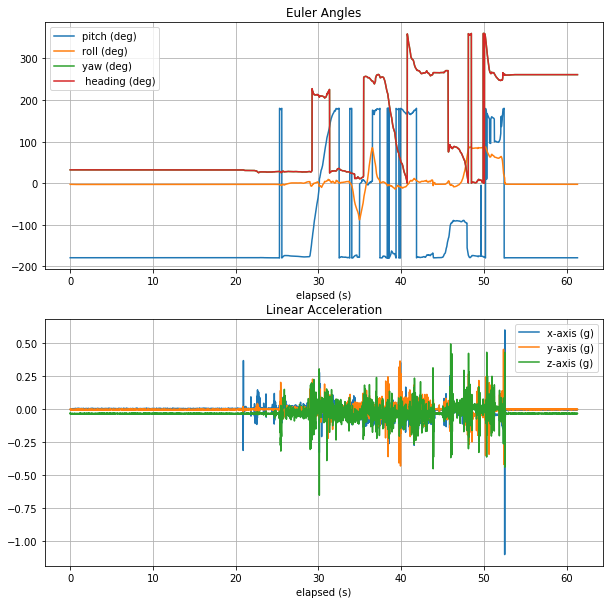

HTML(value='')

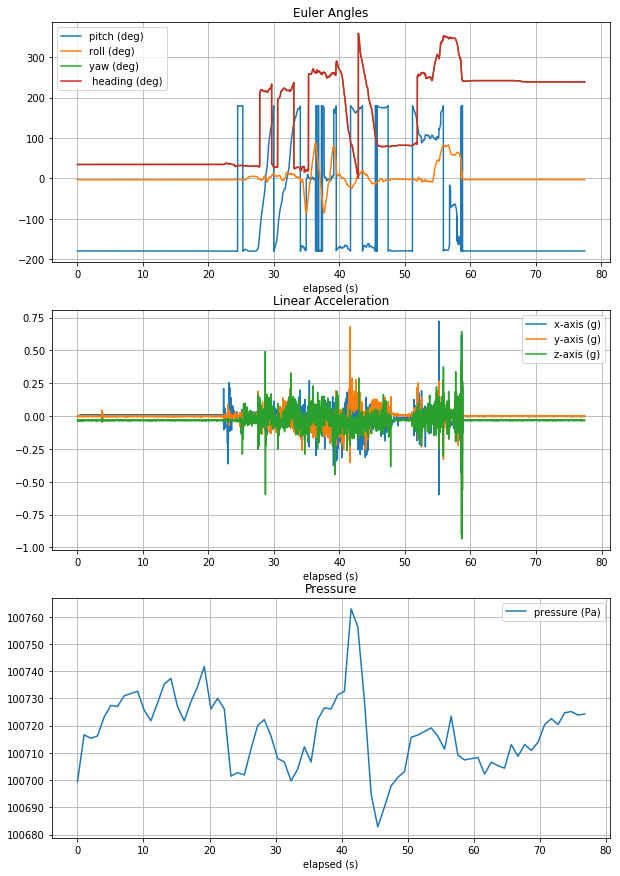

HTML(value='')

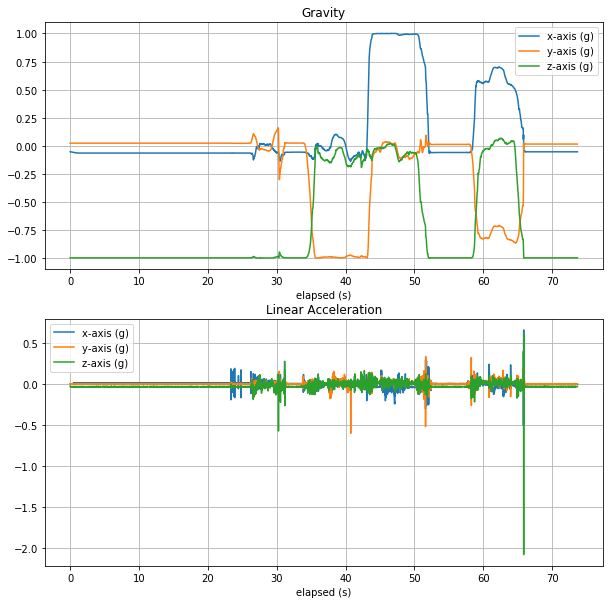

HTML(value='')

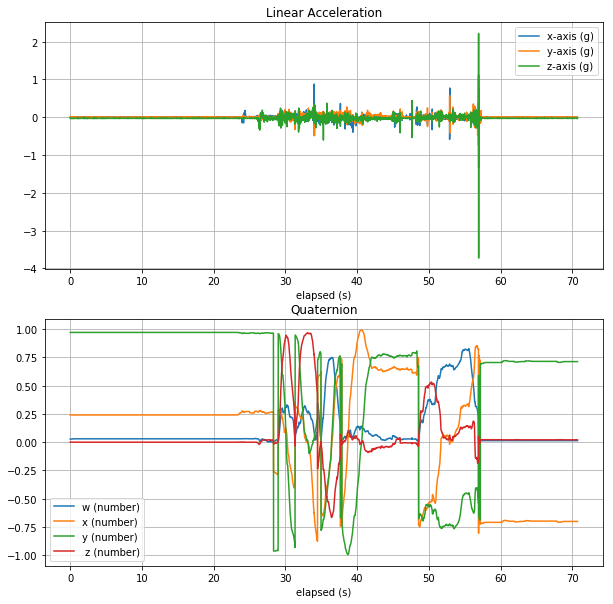

HTML(value='')

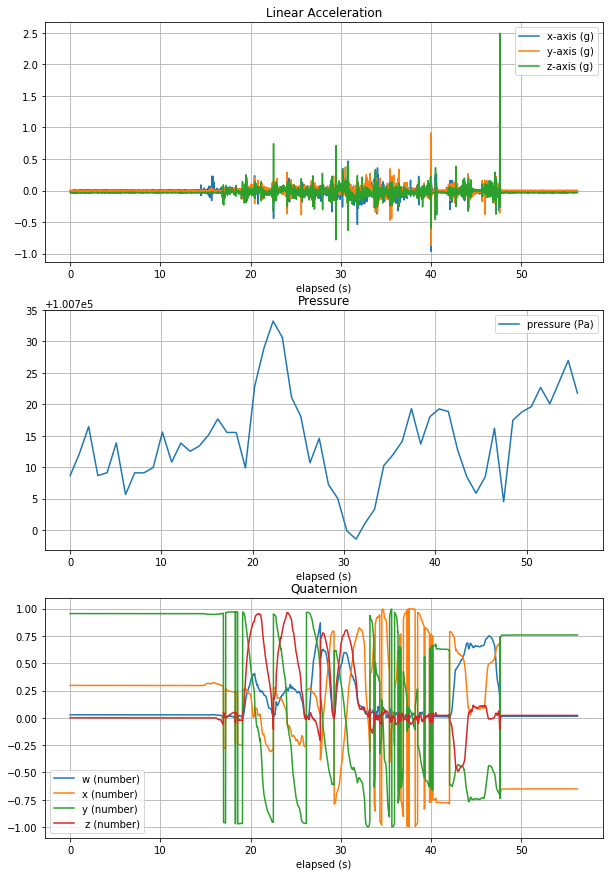

HTML(value='')

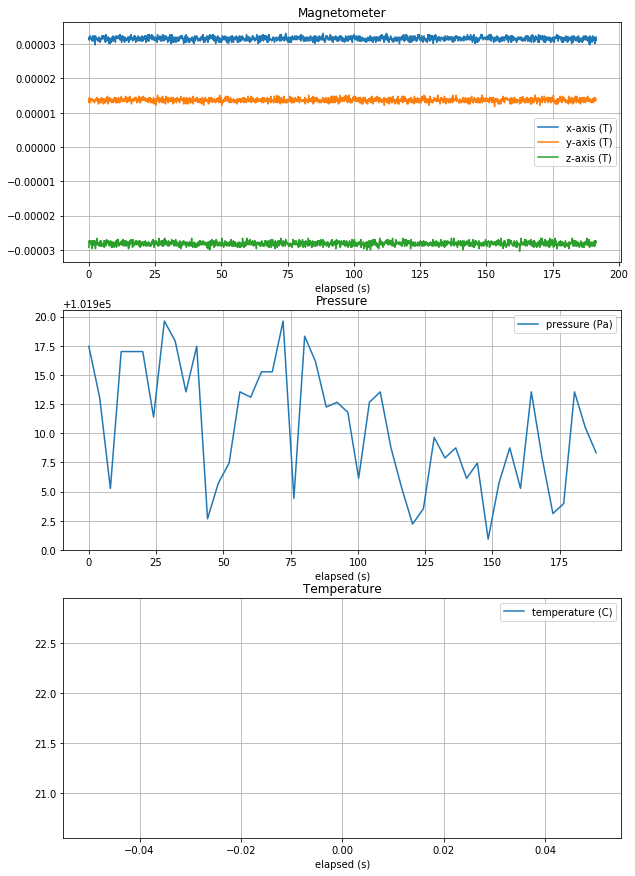

HTML(value='')

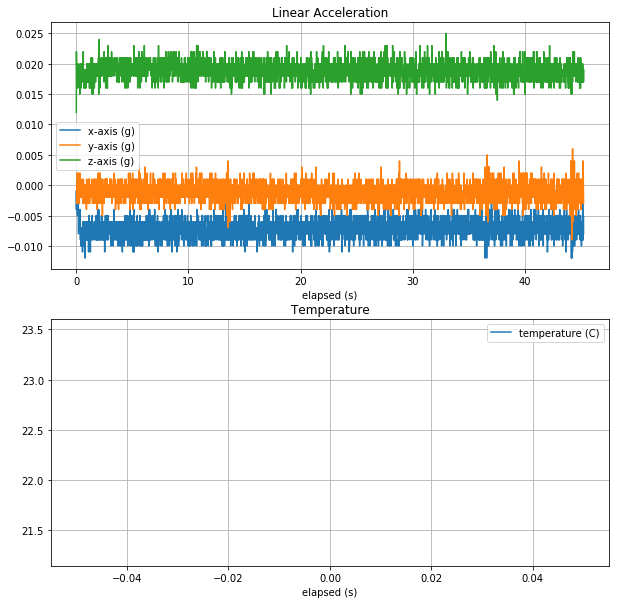

True

In [3]:
# View data
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

ax_width = 10
ax_height = 5


def view(df, x, y, ax, t=''):
    """
    Views the given CSV data
    
    Param:
        file: DataFrame()
        x: str/int
            Column designated as x value
        y: str[]/int[]
            Columns designated as y values
        ax: Axis()
    """
    df.plot(x=x, y=y, ax=ax)
    ax.grid()
    ax.set_title(t)
    #     plt.show()

    True


def view_all(files, given_x=2):
    """
    Views the given data in all the files
    
    Param:
        files: {}[]
            The files, ordered by filename
        given_x: The likely x value
    """
    # Determine the likely y value
    given_y = given_x + 1

    for f in files:
        html = widgets.HTML()
        display(html)
        html.value = '<b>' + f['name'] + '/<b>'

        fig, ax = plt.subplots(len(f['info']),
                               figsize=(ax_width, ax_height * len(f['info'])))

        for ix, mode in enumerate(f['info']):
            #             print(f['name'], mode['filemode'], ix)
            df = pd.read_csv(mode['address'])
            view(df,
                 df.columns[given_x],
                 df.columns[given_y:],
                 ax[ix],
                 t=mode['filemode'])

        plt.show()

    return True


view_all(files)

In [4]:
# files